<a href="https://colab.research.google.com/github/cyp-ark/semisupervisedlearning/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils
from keras.datasets import cifar10


In [19]:
img_input = keras.Input(shape=(32,32,3))
aug_input = layers.GaussianNoise(stddev = 0.15)(img_input)

In [104]:
x1 = layers.Conv2D(128,(3,3),padding="same")(aug_input)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.MaxPool2D((2,2))(x1)
x1 = layers.Dropout(rate=0.5)(x1)

x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.MaxPool2D((2,2))(x1)
x1 = layers.Dropout(rate=0.5)(x1)

x1 = layers.Conv2D(512,(3,3),padding="valid")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(1,1))(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(1,1))(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.GlobalAveragePooling2D()(x1)
output1 = layers.Dense(10, activation = "Softmax", name="z")(x1)

In [105]:
x2 = layers.Conv2D(128,(3,3),padding="same")(aug_input)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(rate=0.5)(x2)

x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(rate=0.5)(x2)

x2 = layers.Conv2D(512,(3,3),padding="valid")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(1,1))(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(1,1))(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.GlobalAveragePooling2D()(x2)
output2 = layers.Dense(10, activation = "Softmax",name="z_hat")(x2)

In [110]:
model = keras.Model(inputs=img_input, outputs = [output1, output2])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 gaussian_noise_10 (GaussianNoi  (None, 32, 32, 3)   0           ['input_3[0][0]']                
 se)                                                                                              
                                                                                                  
 conv2d_92 (Conv2D)             (None, 32, 32, 128)  3584        ['gaussian_noise_10[0][0]']      
                                                                                                  
 conv2d_101 (Conv2D)            (None, 32, 32, 128)  3584        ['gaussian_noise_10[0][0]']

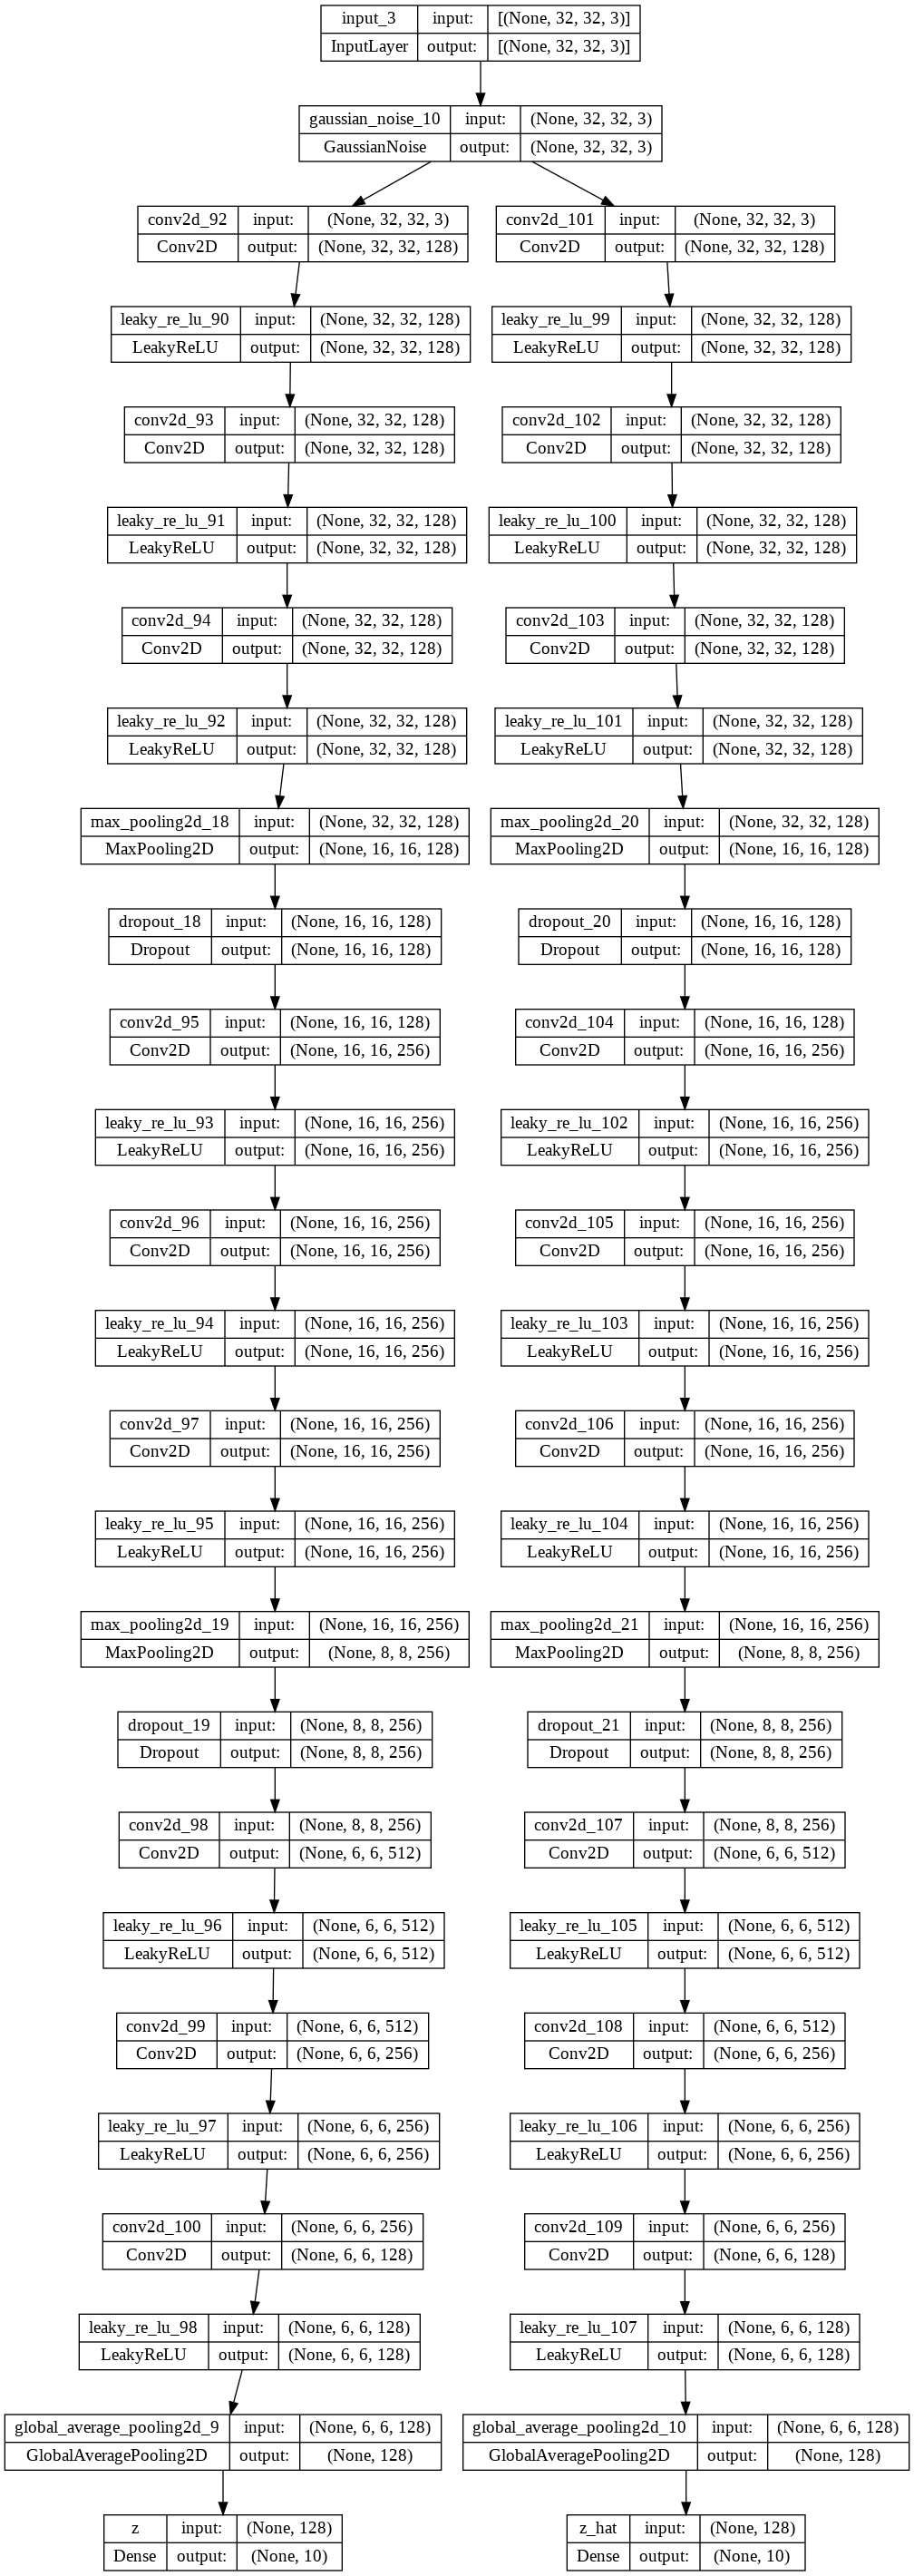

In [107]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [34]:
from tensorflow.keras import losses
def pi_model_loss(y_true,y_pred):

  return 
  
    

In [111]:
(X_train, y_train), (X_test,y_test) =cifar10.load_data()

In [112]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

model.compile(
    optimizer = keras.optimizers.Adam,
    loss={
        "z":keras.losses.CategoricalCrossentropy(from_logits=True),
        "z_hat":keras.losses.CategoricalCrossentropy(from_logits=True)
    },
    loss_weight = {"z":0.8,"z_hat":0.2}
)


history = model.fit(X_train, y_train, batch_size=300, epochs=3)

test_scores = model.evaluate(X_test,y_test,verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

TypeError: ignored